In [ ]:
### import pandas as pd
import numpy as np
import pandas as pd
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# df = pd.DataFrame({'gender':['m','f','f','m'],
#                    'education':['phd','masters','grad','highschool']})
# df

In [ ]:
# df2 = pd.get_dummies(df , columns = ['gender'], drop_first = True)
# df2

In [ ]:
# from sklearn.preprocessing import LabelEncoder

# le = LabelEncoder()

# df2['education'] = le.fit_transform(df2['education'])
# df2

In [ ]:
# Outliers - contionous features only - not be done on target columns

In [ ]:
data_frame = pd.read_csv('Boston_housing.csv')
data_frame.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
# data_frame['AGE'][2,78,34,95,13]=np.nan

In [ ]:
data_frame.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
# data_frame['AGE'] = data_frame['AGE'].fillna(data_frame['AGE'].median())

In [ ]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


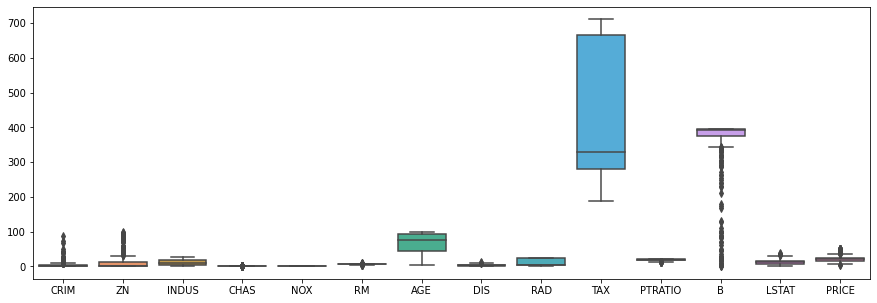

In [ ]:
fig = plt.figure(figsize = (15,5))
sns.boxplot(data = data_frame)
# sns.boxplot(data = data_frame['ZN'])

In [ ]:
for i in data_frame.drop(['CHAS','PRICE'], axis=1).columns:
    print(i)
    sns.boxplot(data_frame[i],data = data_frame)
    plt.show()

In [ ]:
def Outlier(data, cols):
    for column in data.drop(cols, axis=1).columns:
        if data[column].dtype != object:
            Q1 = np.percentile(data[column],25)
            Q3 = np.percentile(data[column],75)
            IQR =  Q3 - Q1
            lower = Q1 - (1.5 * IQR) # min value allowed
            upper = Q3 + (1.5 * IQR)  # max. value allowed
            
            data[column] = data[column].apply(lambda x: upper if x>upper else  lower if x<lower else x)          

    return data

data_frame2 = Outlier(data = data_frame, cols = ['CHAS','PRICE'])
data_frame2.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE'],
      dtype='object')

In [ ]:
data_frame2['RM'].dtype

dtype('float64')

In [ ]:
data_frame2['LSTAT'].dtype

dtype('float64')

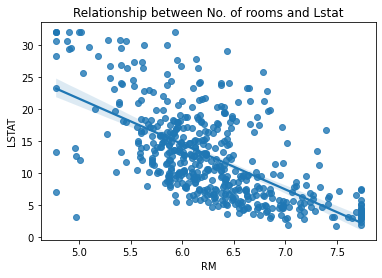

In [ ]:
sns.regplot(x="RM",y="LSTAT", data=data_frame2, fit_reg=True)
plt.title("Relationship between No. of rooms and Lstat")
plt.show()

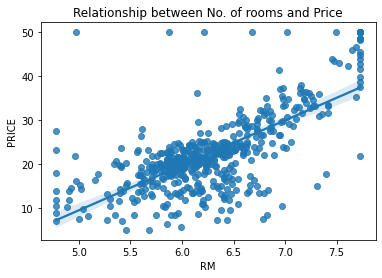

In [ ]:
# Between prices and No. of rooms
sns.regplot(x="RM",y="PRICE", data=data_frame2)
plt.title("Relationship between No. of rooms and Price")
plt.show()

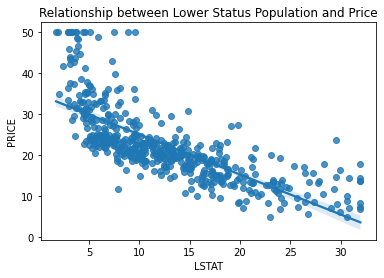

In [ ]:
# Between prices and Lower Status Population
sns.regplot(y="PRICE",x="LSTAT", data=data_frame2, fit_reg= True)
plt.title("Relationship between Lower Status Population and Price")
plt.show()

In [ ]:
for val in data_frame2.drop(['PRICE','CHAS'], axis = 1):
    sns.distplot(data_frame2[val], kde = False,bins=20,label=val)
    plt.legend()
    plt.show()


In [ ]:
data_frame2.duplicated().sum()

0

In [ ]:
data_frame2[data_frame2.duplicated()==True].index # to get to know the duplicate data indexs

Int64Index([], dtype='int64')

In [ ]:
# Drop Duplicate Records in a data
data_frame2.drop_duplicates(inplace=True)

In [ ]:
data_frame2.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,2.225032,6.963439,11.136779,0.069170,0.554695,6.275312,68.574901,3.783947,9.549407,408.237154,18.463834,381.918836,12.612011,22.532806
std,3.313353,12.028788,6.860353,0.253994,0.115878,0.630242,28.148861,2.069765,8.707259,168.537116,2.143924,19.054913,7.016829,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,4.778500,2.900000,1.129600,1.000000,187.000000,13.200000,344.106250,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,9.069639,31.250000,27.740000,1.000000,0.871000,7.730500,100.000000,9.820800,24.000000,711.000000,22.000000,396.900000,31.962500,50.000000


In [ ]:
data_frame2.corr()
# -1 to +1  -- close to 0 means NO IMPACT

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.370213,0.629315,-0.030748,0.663412,-0.260057,0.518951,-0.555054,0.926977,0.870686,0.416269,-0.436156,0.592587,-0.454495
ZN,-0.370213,1.000000,-0.584079,-0.038059,-0.549670,0.357439,-0.583149,0.681019,-0.344043,-0.383860,-0.432409,0.236768,-0.448131,0.374691
INDUS,0.629315,-0.584079,1.000000,0.062938,0.763651,-0.408704,0.644779,-0.713079,0.595129,0.720760,0.382359,-0.417485,0.608158,-0.483725
CHAS,-0.030748,-0.038059,0.062938,1.000000,0.091203,0.081545,0.086518,-0.099435,-0.007368,-0.035587,-0.123763,-0.011069,-0.053288,0.175260
NOX,0.663412,-0.549670,0.763651,0.091203,1.000000,-0.322413,0.731470,-0.775934,0.611441,0.668023,0.190159,-0.427034,0.595619,-0.427321
RM,-0.260057,0.357439,-0.408704,0.081545,-0.322413,1.000000,-0.258788,0.224486,-0.206041,-0.292737,-0.353695,0.196260,-0.634425,0.701725
AGE,0.518951,-0.583149,0.644779,0.086518,0.731470,-0.258788,1.000000,-0.753333,0.456022,0.506456,0.263355,-0.307560,0.606711,-0.376955
DIS,-0.555054,0.681019,-0.713079,-0.099435,-0.775934,0.224486,-0.753333,1.000000,-0.500007,-0.540200,-0.238556,0.311406,-0.502644,0.253172
RAD,0.926977,-0.344043,0.595129,-0.007368,0.611441,-0.206041,0.456022,-0.500007,1.000000,0.910228,0.466698,-0.392793,0.489186,-0.381626
TAX,0.870686,-0.383860,0.720760,-0.035587,0.668023,-0.292737,0.506456,-0.540200,0.910228,1.000000,0.462693,-0.433288,0.545598,-0.468536


In [ ]:
data_frame2.isna().sum() # total null value count

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

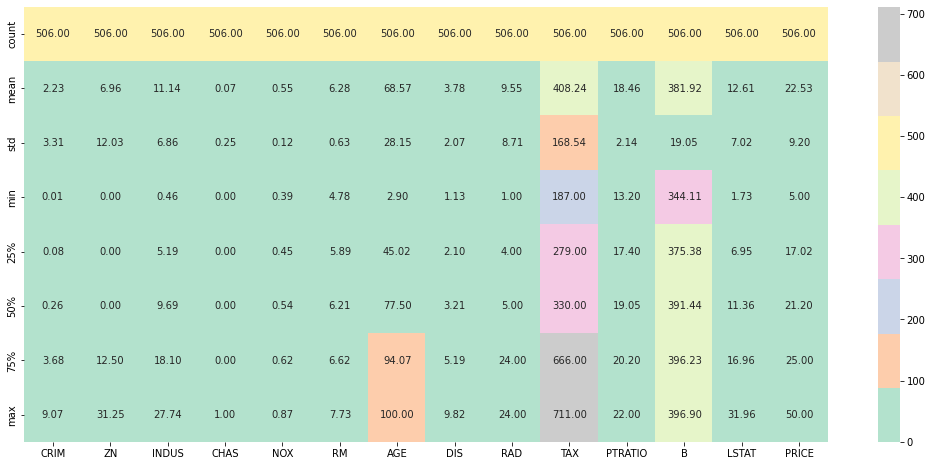

In [ ]:
fig=plt.figure(figsize=(18,8))
sns.heatmap(data_frame.describe(), annot = True, fmt='0.2f', cmap='Pastel2') # used where data has more than 2d

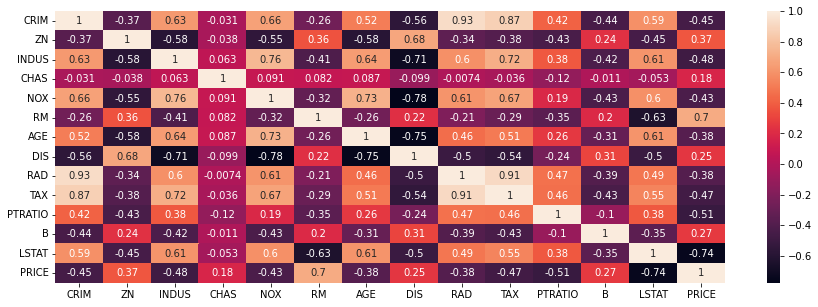

In [ ]:
fig = plt.figure(figsize = (15,5))
sns.heatmap(data_frame2.corr(), annot = True)

In [ ]:
X = data_frame2.drop(['PRICE','CHAS','DIS','B', 'RAD'], axis = 1) # Independet Feature
y = data_frame2['PRICE'] # Target

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state = 1)


In [ ]:
X_train.head()

,CRIM,ZN,INDUS,NOX,RM,AGE,TAX,PTRATIO,LSTAT
502,0.04527,0.0,11.93,0.573,6.120,76.7,273.0,21.0,9.08
172,0.13914,0.0,4.05,0.510,5.572,88.5,296.0,16.6,14.69
80,0.04113,25.0,4.86,0.426,6.727,33.5,281.0,19.0,5.29
46,0.18836,0.0,6.91,0.448,5.786,33.3,233.0,17.9,14.15
318,0.40202,0.0,9.90,0.544,6.382,67.2,304.0,18.4,10.36


In [ ]:
X_test.head()

,CRIM,ZN,INDUS,NOX,RM,AGE,TAX,PTRATIO,LSTAT
307,0.04932,31.25,2.18,0.472,6.849,70.3,222.0,18.4,7.53
343,0.02543,31.25,3.78,0.484,6.696,56.4,370.0,17.6,7.18
47,0.22927,0.00,6.91,0.448,6.030,85.5,233.0,17.9,18.80
67,0.05789,12.50,6.07,0.409,5.878,21.4,345.0,18.9,8.10
362,3.67822,0.00,18.10,0.770,5.362,96.2,666.0,20.2,10.19


In [ ]:
y_test.head()

307    28.2
343    23.9
47     16.6
67     22.0
362    20.8
Name: PRICE, dtype: float64

In [ ]:
# importing algorithm
from sklearn.linear_model import LinearRegression

# Create a Linear regressor
lm = LinearRegression()

# Train the model using the training sets 
lm.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = lm.predict(X_test)
y_pred

array([27.57136364, 27.18984932, 20.11133443, 23.01069482, 17.17127162,
       21.52306912, 27.23014811, 20.00051305, 21.40218985, 26.77855184,
       27.19256679, 28.7398222 , 20.19205519, 23.77253171, 23.12525758,
       19.83899441, 16.1702647 , 35.64855206, 28.52580353,  8.18629052,
       21.65385861, 19.51536068, 26.79114495, 26.03161113, 29.01657848,
       12.44112452, 15.2356183 , 22.83880881, 35.20098331, 12.40550359,
       27.11277732, 15.65721865, 37.87429885, 18.32673905, 25.3870682 ,
       18.34985632, 17.03494549, 31.0097487 ,  9.19188983, 19.40412661,
       26.83834204, 24.13666674, 29.27728288, 14.25044576, 18.66149981,
       16.0675713 , 40.76566934, 17.52734995, 29.34389172, 22.28804504,
       23.92132346, 25.35637016, 28.42696961, 29.26303834,  5.19612339,
       25.62205094,  7.86692446, 26.32946879, 17.90388579, 35.63146294,
       20.27695158, 28.71056688, 14.37194084, 19.47346955,  7.17689405,
       31.41997994, 36.7631785 , 28.32601765, 26.94763713, 26.95

In [ ]:
# visualising predictions along with actual data and price
test_results = pd.DataFrame(X_test.copy())
test_results['y_test'] = y_test
test_results['predictions'] = y_pred
test_results

,CRIM,ZN,INDUS,NOX,RM,AGE,TAX,PTRATIO,LSTAT,y_test,predictions
307,0.04932,31.25,2.18,0.472,6.849,70.3,222.0,18.4,7.53,28.2,27.571364
343,0.02543,31.25,3.78,0.484,6.696,56.4,370.0,17.6,7.18,23.9,27.189849
47,0.22927,0.00,6.91,0.448,6.030,85.5,233.0,17.9,18.80,16.6,20.111334
67,0.05789,12.50,6.07,0.409,5.878,21.4,345.0,18.9,8.10,22.0,23.010695
362,3.67822,0.00,18.10,0.770,5.362,96.2,666.0,20.2,10.19,20.8,17.171272
...,...,...,...,...,...,...,...,...,...,...,...
41,0.12744,0.00,6.91,0.448,6.770,2.9,233.0,17.9,4.84,26.6,29.738264
361,3.83684,0.00,18.10,0.770,6.251,91.1,666.0,20.2,14.19,19.9,17.866825
289,0.04297,31.25,5.32,0.405,6.565,22.9,293.0,16.6,9.51,24.8,26.677011
498,0.23912,0.00,9.69,0.585,6.019,65.3,391.0,19.2,12.92,21.2,19.821981


In [ ]:
'''y = mx +c -----> y = m1x1 + m2mx + .....+ mN Xn + C'''
display(lm.intercept_ , list(zip(lm.coef_, X_train.columns)))

32.8119501673562

[(0.26658258489194536, 'CRIM'),
 (-0.04660245196793842, 'ZN'),
 (0.08127803782907662, 'INDUS'),
 (-13.025500790326305, 'NOX'),
 (3.885868488287521, 'RM'),
 (0.029859809711722616, 'AGE'),
 (-0.0032234348115106806, 'TAX'),
 (-1.1324837590625276, 'PTRATIO'),
 (-0.6622459110219587, 'LSTAT')]

In [ ]:
coeff_df = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
CRIM,0.266583
ZN,-0.046602
INDUS,0.081278
NOX,-13.025501
RM,3.885868
AGE,0.029860
TAX,-0.003223
PTRATIO,-1.132484
LSTAT,-0.662246


In [ ]:
from sklearn.metrics import  mean_absolute_error, mean_squared_error, r2_score

In [ ]:
print('R^2:',metrics.r2_score(y_test, y_pred))

print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

print('MAE:',metrics.mean_absolute_error(y_test, y_pred))

print('MSE:',metrics.mean_squared_error(y_test, y_pred))

print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R^2: 0.7010244929607405
Adjusted R^2: 0.6780263770346436
MAE: 4.273027745213819
MSE: 29.616057358223337
RMSE: 5.442063703984302


#### OVERFITTING and UNDERFITTING

Overfitting happens to have - when Train Results (90 R2) > Test Results (60 R2)


Underfittig happens to have - Both Train and Test Results are not Good  - (R2 score - 50- train data & r2 score - 48 test data)

In [ ]:
y_train_pred = lm.predict(X_train)

print('R^2 Train:',metrics.r2_score(y_train, y_train_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_train_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE train:',metrics.mean_absolute_error(y_train, y_train_pred))
print('MSE train:',metrics.mean_squared_error(y_train, y_train_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train,y_train_pred)))

y_pred = lm.predict(X_test)
print('\n R^2 Test:',metrics.r2_score(y_test, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE test:',metrics.mean_absolute_error(y_test, y_pred))
print('MSE test:',metrics.mean_squared_error(y_test, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R^2 Train: 0.6796855068270935
Adjusted R^2: 0.6718729582131202
MAE train: 3.517343723696823
MSE train: 25.424330220900515
RMSE: 5.042254477998955

 R^2 Test: 0.7010244929607405
Adjusted R^2: 0.6780263770346436
MAE test: 4.273027745213819
MSE test: 29.616057358223337
RMSE: 5.442063703984302


In [ ]:
# Bias Variance TradeOff 

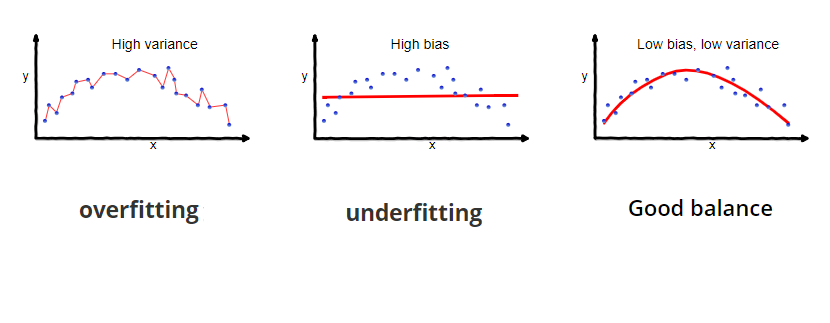